In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

### Loading al the online stores final product CSV's and merging them

In [2]:
df_aliexpress = pd.read_csv("ali_express_ALLDATA.csv")
df_amazon = pd.read_csv("amazon_ALLDATA.csv")
df_temu = pd.read_csv("temu_ALLDATA.csv")

df = pd.concat([df_aliexpress, df_amazon, df_temu], axis=0)
df = df.drop(["Unnamed: 0"],axis=1)
df

,store_id,category_id,title,price,n_reviews,n_sold_units
0,2,5,HYPER GO MJX14301 14302 14303 1/14 RC Car Brus...,106.80,61,279
1,2,5,6167pcs Film Series of the Rings Rives Street ...,141.44,12,86
2,2,5,ImmersionRC PowerPlay FPV DVR h264 Encoding / ...,177.97,8,181
3,2,5,26pcs Alphabet Lore Plush English Letter Stuff...,32.73,31,276
4,2,5,Icons Technical 911 Retro Car Model 10295 Buil...,31.48,134,1000
...,...,...,...,...,...,...
495,3,4,"1 Pair 8.66""*5.9"" Insulation Kitchen Gloves, M...",3.99,63,16
496,3,4,"1 Pair Kitchen Silicone Dishwashing Gloves, Cl...",1.99,20,15
497,3,4,"1pc Wooden Handle Coffee Grinder Brush, Coffee...",2.79,6,14
498,3,4,"1pc 10 Inches Stainless Steel Shower Squeegee,...",7.49,1,14


### The necessary checkings...

In [3]:
df.isna().sum()

store_id        0
category_id     0
title           0
price           0
n_reviews       0
n_sold_units    0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1358 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      1358 non-null   int64  
 1   category_id   1358 non-null   int64  
 2   title         1358 non-null   object 
 3   price         1358 non-null   float64
 4   n_reviews     1358 non-null   int64  
 5   n_sold_units  1358 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 74.3+ KB


# EDA starts...

<function matplotlib.pyplot.show(close=None, block=None)>

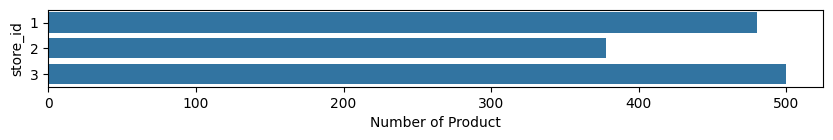

In [6]:
# amount of product per online store

product_per_store = df["store_id"].value_counts()

plt.figure(figsize=(10,1))
sns.barplot(y= product_per_store.index, x=product_per_store.values, orient = "h")
plt.xlabel("Number of Product")
plt.ylabel("store_id")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

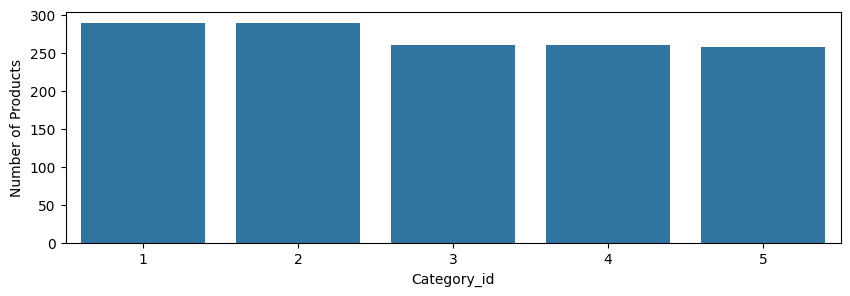

In [7]:
# amount of product per category
product_per_cat = df["category_id"].value_counts()

plt.figure(figsize=(10,3))
sns.barplot(x=product_per_cat.index,y= product_per_cat.values)
plt.xlabel("Category_id")
plt.ylabel("Number of Products")
plt.show

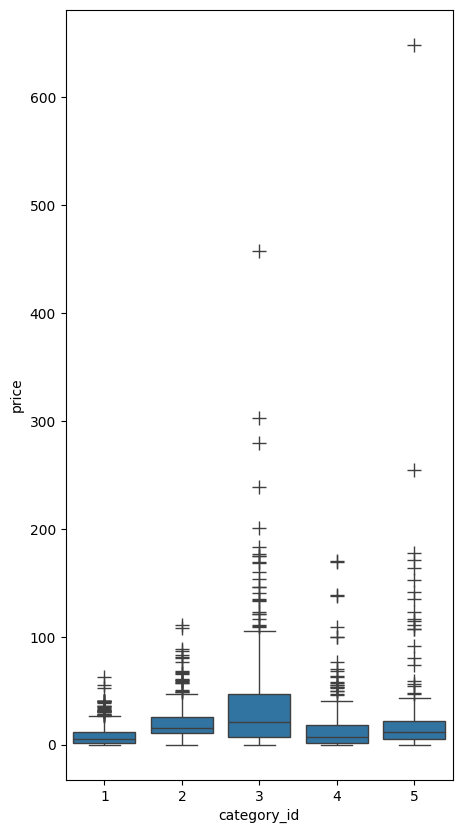

In [20]:
#looking for outliers on product price for each category

plt.figure(figsize=(5, 10))
sns.boxplot(data=df, x="category_id", y="price", flierprops=dict(marker='+', color='red', markersize=10))
plt.show()

### Relationship analysis

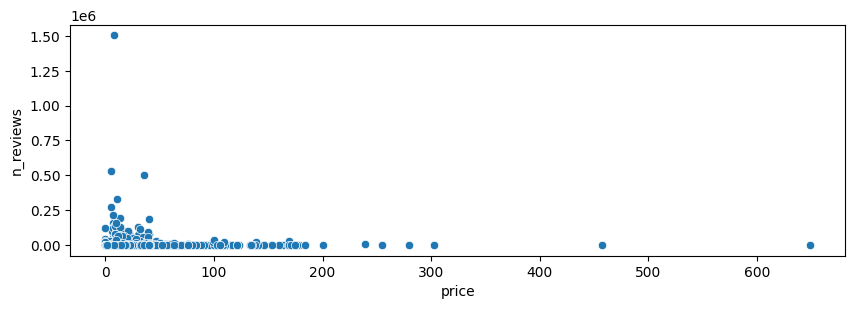

Pearson co-relation of price vs reviews: -0.023259446883833513
Spearman co-relation of price vs reviews: -0.012031974344599204


In [9]:
plt.figure(figsize=(10,3))
sns.scatterplot(x = df["price"], y = df["n_reviews"])
plt.show()

print("Pearson co-relation of price vs reviews:",(df["price"].corr(df["n_reviews"], method="pearson")))
print("Spearman co-relation of price vs reviews:",(df["price"].corr(df["n_reviews"], method="spearman")))

- It has a negative relation between price and number of reviews. 
- When the price increase the reviews tends to decrease. But the relationship is weaker


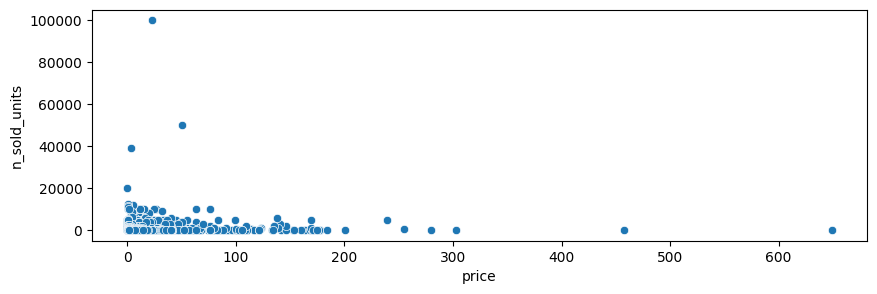

Pearson co-relation of price vs sold units: -0.03545092465565657
Spearman co-relation of price vs sold units: -0.12413626571101627


In [10]:
plt.figure(figsize=(10,3))
sns.scatterplot(x = df["price"], y = df["n_sold_units"])
plt.show()

print("Pearson co-relation of price vs sold units:",(df["price"].corr(df["n_sold_units"], method="pearson")))
print("Spearman co-relation of price vs sold units:",(df["price"].corr(df["n_sold_units"], method="spearman")))

- It has a negative relation between price and number of sold units.
- When the price increase the number for sold items tends to decrease. But the relationship is weaker


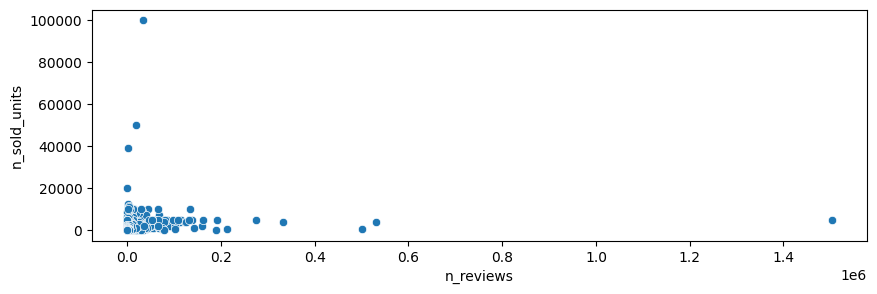

Pearson co-relation of reviews vs sold units: 0.10816779193822741
Spearman co-relation of reviews vs sold units: 0.7069227186960023


In [11]:
plt.figure(figsize=(10,3))
sns.scatterplot(x = df["n_reviews"], y = df["n_sold_units"])
plt.show()

print("Pearson co-relation of reviews vs sold units:",(df["n_reviews"].corr(df["n_sold_units"], method="pearson")))
print("Spearman co-relation of reviews vs sold units:",(df["n_reviews"].corr(df["n_sold_units"], method="spearman")))

- It has a positive relation between reviews and number of sold units. 
- As one increase the other one tends to increase.

C:\Users\Amira\AppData\Local\Temp\ipykernel_3264\4000189956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='store_id', y='price', palette="coolwarm")


Text(0, 0.5, 'distribution of price')

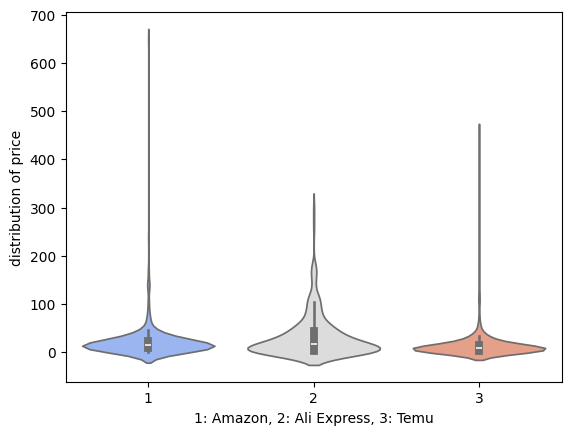

In [12]:
#visualizing the distribution of price among the online stores

sns.violinplot(data=df, x='store_id', y='price', palette="coolwarm")
plt.xlabel("1: Amazon, 2: Ali Express, 3: Temu")
plt.ylabel("distribution of price")

### 1st Hypothesis Testing

- H0: Average product price for Amazon = AliExpress = Temu
- H1: Average product price for Amazon != AliExpress != Temu

In [13]:
prices_Amazon = df[df["store_id"] == 1]["price"]
prices_AliExpress = df[df["store_id"] == 2]["price"]
prices_Temu = df[df["store_id"] == 3]["price"]

# Perform one-way ANOVA
f_statistic, p_value = st.f_oneway(prices_Amazon, prices_AliExpress, prices_Temu)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant difference in average product prices between the online stores.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference in average product prices between the online stores.")

F-statistic: 26.353210303523838
P-value: 5.914670387683464e-12
Reject the null hypothesis (H0). There is a significant difference in average product prices between the online stores.


In [14]:
print(prices_Amazon.mean())
print(prices_AliExpress.mean())
print(prices_Temu.mean())

21.276229166666667
32.25452380952381
14.057660000000002


### 2nd Hypothesis Testing

- H0: Price is not a strong predictor for number of sold units.
- H1: Price is a strong predictor for number of sold units.

In [15]:
X = df['price']
y = df['n_sold_units']

# Add a constant to the predictor variable (this is needed for statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()


# Interpretation
p_value = model.pvalues['price']
r_squared = model.rsquared
alpha = 0.05

print(f"P-value for n_reviews: {p_value}")
print(f"R-squared: {r_squared}")

if p_value < alpha:
    print("Reject the null hypothesis (H0). price is not a strong predictor of n_sold_units.")
else:
    print("Fail to reject the null hypothesis (H0). price is a strong predictor of n_sold_units.")

P-value for n_reviews: 0.19168480167786545
R-squared: 0.001256768058941149
Fail to reject the null hypothesis (H0). price is a strong predictor of n_sold_units.


- Regression for price vs sold units

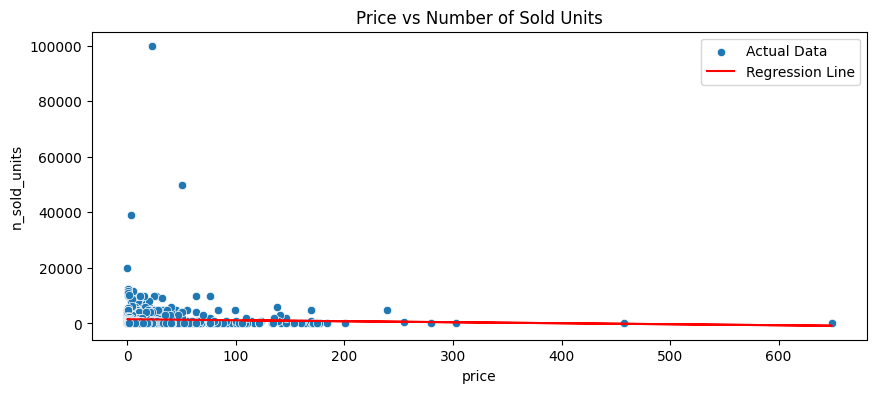

In [16]:
X = df[["price"]]  # Independent variable: Price
Y = df["n_sold_units"]  # Dependent variable: Units Sold

# Create the regression model
model = LinearRegression()

# Fit the model
model.fit(X, Y)

# Predict Y values (Units Sold) using the model
y_pred = model.predict(X)

# Plot Price vs Sold Units with regression line
plt.figure(figsize=(10,4))
sns.scatterplot(x="price", y="n_sold_units", data=df, label='Actual Data')

plt.plot(df["price"], y_pred, color='red', label='Regression Line')
plt.title("Price vs Number of Sold Units")
plt.xlabel("price")
plt.ylabel("n_sold_units")
plt.legend()
plt.show()

### 3rd Hypothesis Testing

- H0: Number of Rreviews per product has a strong prediction on number of sold units.
- H1: Number of Rreviews per product has no strong prediction on number of sold units.

In [17]:
X = df['n_reviews']
y = df['n_sold_units']

# Add a constant to the predictor variable (this is needed for statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()


# Interpretation
p_value = model.pvalues['n_reviews']
r_squared = model.rsquared
alpha = 0.05

print(f"P-value for n_reviews: {p_value}")
print(f"R-squared: {r_squared}")

if p_value < alpha:
    print("Reject the null hypothesis (H0). n_reviews is not a strong predictor of n_sold_units.")
else:
    print("Fail to reject the null hypothesis (H0). n_reviews is a strong predictor of n_sold_units.")

P-value for n_reviews: 6.492668731122193e-05
R-squared: 0.011700271212791269
Reject the null hypothesis (H0). n_reviews is not a strong predictor of n_sold_units.


In [18]:
#df to csv for tableau 

df.to_csv("all_product_data.csv")

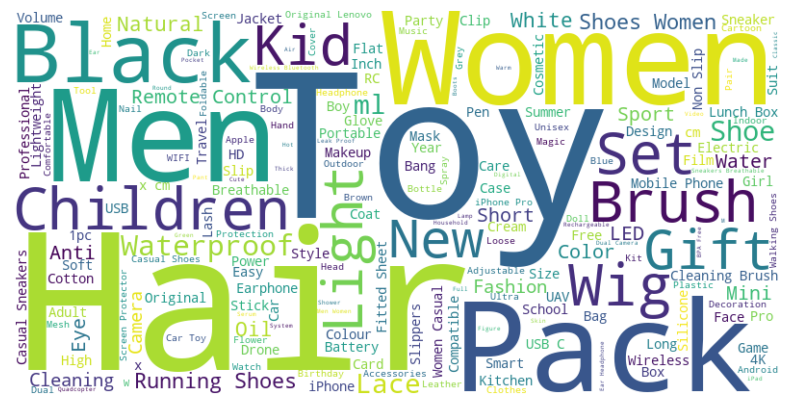

In [19]:
from wordcloud import WordCloud

text = ' '.join(df['title'].astype(str))

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()